# Clustering Crypto

In [9]:
# Initial imports
import pandas as pd
import hvplot.pandas as hv
from path import Path
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


ImportError: cannot import name '_Unset' from 'bokeh.settings' (C:\Users\vbhar\Anaconda3\lib\site-packages\bokeh\settings.py)

In [2]:
!pip install hvplot 
!pip install --upgrade plotly


  Using cached https://files.pythonhosted.org/packages/6e/33/1ae0f71395e618d6140fbbc9587cc3156591f748226075e0f7d6f9176522/Markdown-3.3.4-py3-none-any.whl


ERROR: panel 0.11.3 has requirement bokeh<2.4.0,>=2.3.0, but you'll have bokeh 1.3.4 which is incompatible.


  Using cached https://files.pythonhosted.org/packages/95/8d/ac1560f7ccc2ace85cd1e9619bbec1975b5d2d92e6c6fdbbdaa994c6ab4d/plotly-5.1.0-py2.py3-none-any.whl


In [7]:
!pip install --upgrade bokeh

  Created wheel for bokeh: filename=bokeh-2.3.3-cp37-none-any.whl size=11342794 sha256=ed517a32109ae9792ca52e0d2f62334ad766d7e0db4fd43919f4358f3932aa04
  Stored in directory: C:\Users\vbhar\AppData\Local\pip\Cache\wheels\29\25\bd\ece99a9f4f1fdc59da3a94d1cd3e220c1c32624f19e4c19969
Successfully built bokeh
  Found existing installation: Pillow 6.2.0
    Uninstalling Pillow-6.2.0:
      Successfully uninstalled Pillow-6.2.0


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\users\\vbhar\\anaconda3\\lib\\site-packages\\~il\\_imaging.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [5]:
!pip install hvplot

In [1]:
!pip install path

### Deliverable 1: Preprocessing the Data for PCA

In [6]:
# Load the crypto_data.csv dataset.
# YOUR CODE HERE
file_to_read = Path("../crypto_data.csv")
crypto_df = pd.read_csv(file_to_read,index_col = 0)
crypto_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [7]:
crypto_df.dtypes

CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [8]:
# Keep all the cryptocurrencies that are being traded.
# YOUR CODE HERE
Cryptotraded_df = crypto_df.loc[crypto_df.IsTrading == True]

Cryptotraded_df

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
SERO,Super Zero,Ethash,True,PoW,NaN,1000000000
UOS,UOS,SHA-256,True,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,True,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,True,PoW,7.296538e+06,21000000


In [ ]:

# Keep all the cryptocurrencies that have a working algorithm.
# YOUR CODE HERE


In [9]:
# Remove the "IsTrading" column. 
# YOUR CODE HERE
Cryptotraded_df = Cryptotraded_df.drop("IsTrading",axis = 1)
Cryptotraded_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...
SERO,Super Zero,Ethash,PoW,NaN,1000000000
UOS,UOS,SHA-256,DPoI,NaN,1000000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [10]:
# Remove rows that have at least 1 null value.
# YOUR CODE HERE
Cryptotraded_df = Cryptotraded_df.dropna(axis=0,how='any')
Cryptotraded_df


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [11]:
# Keep the rows where coins are mined.
# YOUR CODE HERE
Cryptotraded_df = Cryptotraded_df.loc[Cryptotraded_df.TotalCoinsMined > 0]
Cryptotraded_df

,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...
ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [12]:
# Create a new DataFrame that holds only the cryptocurrencies names.
# YOUR CODE HERE
Cryptonames_df = Cryptotraded_df[["CoinName"]]
Cryptonames_df

,CoinName
42,42 Coin
404,404Coin
1337,EliteCoin
BTC,Bitcoin
ETH,Ethereum
...,...
ZEPH,ZEPHYR
GAP,Gapcoin
BDX,Beldex
ZEN,Horizen


In [13]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm.
# YOUR CODE HERE
Cryptotraded_df = Cryptotraded_df.drop("CoinName",axis = 1)
Cryptotraded_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000
BDX,CryptoNight,PoW,9.802226e+08,1400222610
ZEN,Equihash,PoW,7.296538e+06,21000000


In [14]:
# Use get_dummies() to create variables for text features.
# YOUR CODE HERE
x = pd.get_dummies(data=Cryptotraded_df, columns = ["Algorithm","ProofType"])
x

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,Algorithm_Cloverhash,Algorithm_Counterparty,Algorithm_CryptoNight,Algorithm_CryptoNight Heavy,Algorithm_CryptoNight-V7,Algorithm_Cryptonight-GPU,Algorithm_DPoS,Algorithm_Dagger,Algorithm_Dagger-Hashimoto,Algorithm_ECC 256K1,Algorithm_Equihash,Algorithm_Equihash+Scrypt,Algorithm_Ethash,Algorithm_Exosis,Algorithm_Green Protocol,Algorithm_Groestl,Algorithm_HMQ1725,Algorithm_HybridScryptHash256,Algorithm_IMesh,Algorithm_Jump Consistent Hash,Algorithm_Keccak,Algorithm_Leased POS,Algorithm_Lyra2RE,Algorithm_Lyra2REv2,Algorithm_Lyra2Z,Algorithm_M7 POW,Algorithm_Multiple,Algorithm_NIST5,Algorithm_NeoScrypt,Algorithm_Ouroboros,...,Algorithm_SkunkHash,Algorithm_SkunkHash v2 Raptor,Algorithm_Stanford Folding,Algorithm_TRC10,Algorithm_Time Travel,Algorithm_Tribus,Algorithm_VBFT,Algorithm_VeChainThor Authority,Algorithm_X11,Algorithm_X11GOST,Algorithm_X13,Algorithm_X14,Algorithm_X15,Algorithm_X16R,Algorithm_XEVAN,ProofType_DPOS,ProofType_DPoS,ProofType_HPoW,ProofType_LPoS,ProofType_POBh,ProofType_PoA,ProofType_PoC,ProofType_PoS,ProofType_PoS/LPoS,ProofType_PoS/PoW,ProofType_PoS/PoW/PoT,ProofType_PoST,ProofType_PoW,ProofType_PoW + Hive,ProofType_PoW and PoS,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEPH,2.000000e+09,2000000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GAP,1.493105e+07,250000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
BDX,9.802226e+08,1400222610,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
ZEN,7.296538e+06,21000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [15]:
# Standardize the data with StandardScaler().
# YOUR CODE HERE
x= StandardScaler().fit_transform(x)
x[:2]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

### Deliverable 2: Reducing Data Dimensions Using PCA

In [16]:
# Using PCA to reduce dimension to three principal components.
# YOUR CODE HERE
pca = PCA(n_components=3).fit_transform(x)
pca

array([[-0.34040165,  1.10663568, -0.56021553],
       [-0.32373336,  1.10672105, -0.56055798],
       [ 2.3059732 ,  1.61414337, -0.57430191],
       ...,
       [ 0.32186164, -2.3405845 ,  0.34271389],
       [-0.10708855, -2.04567057,  0.52307997],
       [-0.2969461 ,  0.8583935 , -0.25534839]])

In [17]:
# Create a DataFrame with the three principal components.
# YOUR CODE HERE
pcs_df=pd.DataFrame(pca,columns=["PC 1","PC 2","PC 3"],index=Cryptotraded_df.index)
pcs_df

,PC 1,PC 2,PC 3
42,-0.340402,1.106636,-0.560216
404,-0.323733,1.106721,-0.560558
1337,2.305973,1.614143,-0.574302
BTC,-0.147101,-1.338791,0.193037
ETH,-0.160123,-1.999034,0.346178
...,...,...,...
ZEPH,2.467885,0.910975,0.053294
GAP,-0.338447,1.106508,-0.560244
BDX,0.321862,-2.340584,0.342714
ZEN,-0.107089,-2.045671,0.523080


### Deliverable 3: Clustering Crytocurrencies Using K-Means

#### Finding the Best Value for `k` Using the Elbow Curve

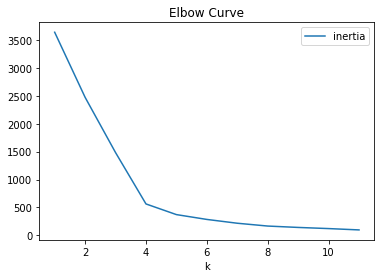

In [18]:
# Create an elbow curve to find the best value for K.
import matplotlib.pyplot as plt

inertia=[]


for k in [x for x in range(1,12)]:
    km = KMeans(n_clusters=k,random_state=0)
    km.fit(pcs_df)
    inertia.append(km.inertia_)


elbow_df=pd.DataFrame({"k":[x for x in range(1,12)],"inertia":inertia})
elbow_df.plot(x= "k",y="inertia",title="Elbow Curve")

Running K-Means with `k=4`

In [19]:
# Initialize the K-Means model.
# YOUR CODE HERE
km = KMeans(n_clusters=4,random_state=0)


# Fit the model
# YOUR CODE HERE
km.fit(pcs_df)

# Predict clusters
# YOUR CODE HERE
Prediction = km.predict(pcs_df)
Prediction

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0,

In [20]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features.
# Concatentate the crypto_df and pcs_df DataFrames on the same columns.
# YOUR CODE HERE
# clustered_df = crypto_df.append(pcs_df)
# clustered_df
# result = pd.concat([crypto_df, pcs_df], axis=1, join='inner')
# display(result)
clustered_df_1 = pd.concat([Cryptotraded_df, pcs_df], axis=1, join='inner')
clustered_df_1

#  Add a new column, "CoinName" to the clustered_df DataFrame that holds the names of the cryptocurrencies. 
# # YOUR CODE HERE

clustered_df_2=pd.DataFrame(Cryptonames_df.CoinName,columns=["CoinName"],index=Cryptonames_df.index)
clustered_df_2


# #  Add a new column, "Class" to the clustered_df DataFrame that holds the predictions.
# # YOUR CODE HERE
clustered_df_3=pd.DataFrame((km.predict(pcs_df)),columns=["Class"],index=clustered_df_1.index)
clustered_df_3

result = pd.concat([clustered_df_1, clustered_df_2,clustered_df_3], axis=1, join='inner')
# display(result)
clustered_df = result


# Print the shape of the clustered_df
print(clustered_df.shape)
clustered_df.head(10)

(532, 9)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.340402,1.106636,-0.560216,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.323733,1.106721,-0.560558,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.305973,1.614143,-0.574302,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.147101,-1.338791,0.193037,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.160123,-1.999034,0.346178,Ethereum,1
LTC,Scrypt,PoW,6.303924e+07,84000000,-0.174096,-1.064843,-0.042373,Litecoin,1
DASH,X11,PoW/PoS,9.031294e+06,22000000,-0.380815,1.198388,-0.471335,Dash,0
XMR,CryptoNight-V7,PoW,1.720114e+07,0,-0.156371,-2.208997,0.347607,Monero,1
ETC,Ethash,PoW,1.133597e+08,210000000,-0.158565,-1.999144,0.346156,Ethereum Classic,1
ZEC,Equihash,PoW,7.383056e+06,21000000,-0.107087,-2.045671,0.523080,ZCash,1


### Deliverable 4: Visualizing Cryptocurrencies Results

#### 3D-Scatter with Clusters

In [21]:
# Creating a 3D-Scatter with the PCA data and the clusters
# YOUR CODE HERE
fig = px.scatter_3d(
    clustered_df,
    x="PC 1",
    y="PC 2",
    z="PC 3",
    color="Class",
    symbol="Class",
    hover_name="CoinName",
    hover_data=["Algorithm"],
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()



In [22]:
clustered_df

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC 1,PC 2,PC 3,CoinName,Class
42,Scrypt,PoW/PoS,4.199995e+01,42,-0.340402,1.106636,-0.560216,42 Coin,0
404,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.323733,1.106721,-0.560558,404Coin,0
1337,X13,PoW/PoS,2.927942e+10,314159265359,2.305973,1.614143,-0.574302,EliteCoin,0
BTC,SHA-256,PoW,1.792718e+07,21000000,-0.147101,-1.338791,0.193037,Bitcoin,1
ETH,Ethash,PoW,1.076842e+08,0,-0.160123,-1.999034,0.346178,Ethereum,1
...,...,...,...,...,...,...,...,...,...
ZEPH,SHA-256,DPoS,2.000000e+09,2000000000,2.467885,0.910975,0.053294,ZEPHYR,0
GAP,Scrypt,PoW/PoS,1.493105e+07,250000000,-0.338447,1.106508,-0.560244,Gapcoin,0
BDX,CryptoNight,PoW,9.802226e+08,1400222610,0.321862,-2.340584,0.342714,Beldex,1
ZEN,Equihash,PoW,7.296538e+06,21000000,-0.107089,-2.045671,0.523080,Horizen,1


In [34]:
# Create a table with tradable cryptocurrencies.
# YOUR CODE HERE

# clustered_df.hvplot.table(columns=["Algorithm"], sortable=True, selectable=True)
# hvplot.show(clustered_df.hvplot())

# Tradeable = clustered_df.hvplot.table(columns=['Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined'], sortable=True, selectable=True)
# print (Tradeable)
# hvplot.show(Tradeable)


clustered_df[['Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined']].hvplot.table()


# def plot(clustered_df):
#     my_plot = clustered_df.hvplot.table(columns=['Algorithm','ProofType','TotalCoinSupply','TotalCoinsMined'], sortable=True, selectable=True)
#     return my_plot








:Table   [Algorithm,ProofType,TotalCoinSupply,TotalCoinsMined]

In [ ]:
# Print the total number of tradable cryptocurrencies.
# YOUR CODE HERE




In [ ]:
# Scaling data to create the scatter plot with tradable cryptocurrencies.
# YOUR CODE HERE

In [ ]:
# Create a new DataFrame that has the scaled data with the clustered_df DataFrame index.
# YOUR CODE HERE

# Add the "CoinName" column from the clustered_df DataFrame to the new DataFrame.
# YOUR CODE HERE

# Add the "Class" column from the clustered_df DataFrame to the new DataFrame. 
# YOUR CODE HERE

plot_df.head(10)

In [ ]:
# Create a hvplot.scatter plot using x="TotalCoinsMined" and y="TotalCoinSupply".
# YOUR CODE HERE
clustered_df.hvplot.scatter(x="TotalCoinsMined", y="TotalCoinSupply", by="class")